In [5]:
!pip install lightgbm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
import scipy.stats as stats

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


from warnings import filterwarnings
filterwarnings('ignore');


In [6]:
data=pd.read_csv('train.csv')
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
data.shape

(165034, 14)

In [10]:
#sns.pairplot(data,hue='Exited')

In [11]:
num_cols_df=data.select_dtypes(include=['int64','float64'])
cat_cols_df=data.select_dtypes(include='object')

In [12]:
data=data.drop('Surname',axis=1)

In [13]:
num_cols=num_cols_df.columns
cat_cols=list(cat_cols_df.columns)
cat_cols.remove('Surname')

# Performing Train Test Split

In [14]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True)

# Encoding Categorical Features

In [16]:
train_cat=pd.get_dummies(X_train[cat_cols],drop_first=True,dtype=float)
X_train=pd.concat([X_train,train_cat],axis=1)
X_train=X_train.drop(cat_cols,axis=1)
X_train

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
149380,149380,15780088,679,41.0,9,0.00,2,1.0,1.0,103560.98,0.0,0.0,1.0
164766,164766,15679760,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0.0,0.0,1.0
155569,155569,15637678,551,35.0,5,0.00,1,1.0,0.0,155394.52,0.0,0.0,1.0
124304,124304,15728693,743,31.0,3,57866.03,2,1.0,1.0,107428.42,0.0,1.0,0.0
108008,108008,15613673,675,28.0,2,0.00,2,1.0,0.0,134110.93,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,119879,15730673,668,45.0,6,104576.80,1,1.0,0.0,113081.42,1.0,0.0,1.0
103694,103694,15731166,751,43.0,7,0.00,2,1.0,0.0,88866.39,0.0,0.0,1.0
131932,131932,15573741,753,39.0,7,0.00,2,1.0,0.0,167973.63,0.0,0.0,0.0
146867,146867,15754574,685,48.0,4,0.00,2,1.0,1.0,24998.75,0.0,0.0,0.0


In [17]:
test_cat=pd.get_dummies(X_test[cat_cols],drop_first=True,dtype=float)
X_test=pd.concat([X_test,test_cat],axis=1)
X_test=X_test.drop(cat_cols,axis=1)
X_test

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
33042,33042,15752375,798,31.0,8,102075.88,1,1.0,0.0,79577.48,0.0,0.0,0.0
36330,36330,15742681,629,26.0,6,0.00,2,1.0,0.0,38190.78,0.0,0.0,1.0
59446,59446,15730397,565,39.0,7,115163.32,3,1.0,0.0,69052.63,0.0,0.0,1.0
92278,92278,15803365,653,55.0,2,70263.83,1,0.0,0.0,62347.71,0.0,1.0,1.0
146750,146750,15735270,557,31.0,6,106596.29,1,1.0,0.0,91305.77,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32661,32661,15791958,719,27.0,2,0.00,2,1.0,1.0,74800.99,0.0,0.0,0.0
117592,117592,15648067,773,32.0,4,0.00,1,1.0,0.0,93983.12,0.0,0.0,0.0
2194,2194,15736069,767,35.0,7,132253.22,1,1.0,0.0,115566.57,1.0,0.0,0.0
141678,141678,15740356,653,33.0,9,0.00,2,1.0,1.0,124489.88,0.0,0.0,0.0


In [18]:
def drop_fun(df,col):
    df=df.drop(col,axis=1)
    return df

# Model Functions

In [21]:
def logistic_model():
    logistic=LogisticRegression(random_state=42)
    lg_model=logistic.fit(X_train,y_train)
    pred=lg_model.predict(X_test)
    acc=accuracy_score(pred,y_test)
    roc=roc_auc_score(y_test,model)
    print("Accuracy = ",acc)
    print("Roc Auc = ",roc)

In [22]:
#logistic_model()

In [23]:
def XGB_model():
    xgb=XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 5, n_estimators= 200, subsample= 0.9)
    xgbmodel=xgb.fit(X_train,y_train)
    pred=xgbmodel.predict(X_test)
    acc=accuracy_score(pred,y_test)
    roc=roc_auc_score(y_test,pred)
    print("Accuracy = ",acc)
    print("Roc Auc = ",roc)

In [24]:
XGB_model()

Accuracy =  0.8681491804768685
Roc Auc =  0.7574311477691633


# Feature Engineering

In [25]:
def distributions_plot(column):
    fig=plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    X_train[column].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(X_train[column], dist='norm',plot=plt)
    plt.tight_layout()
    plt.show()

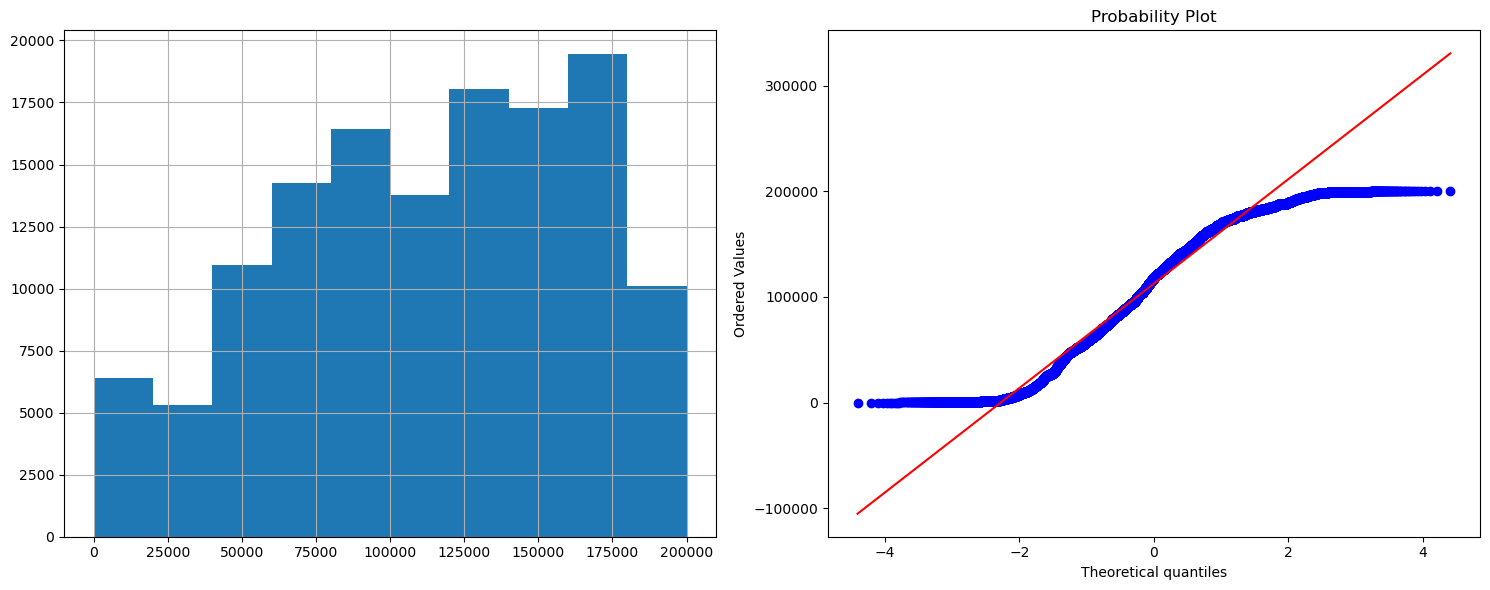

In [26]:
distributions_plot('EstimatedSalary')

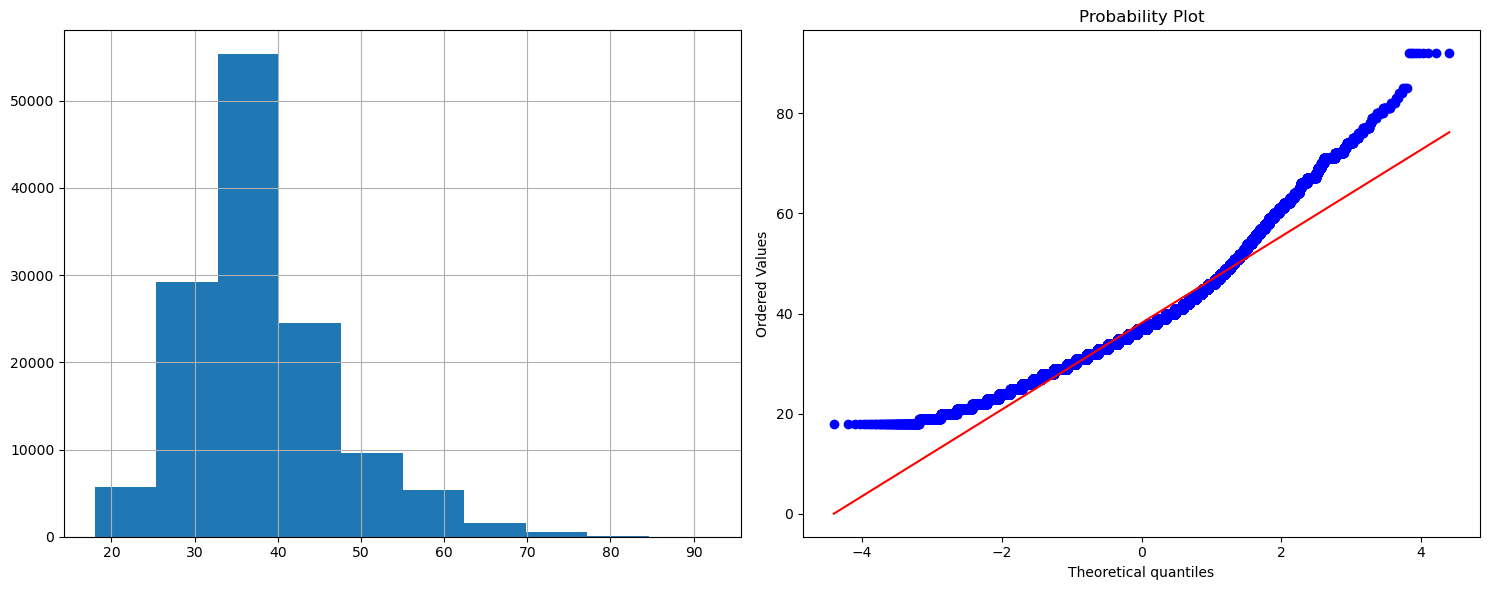

In [27]:
distributions_plot('Age')

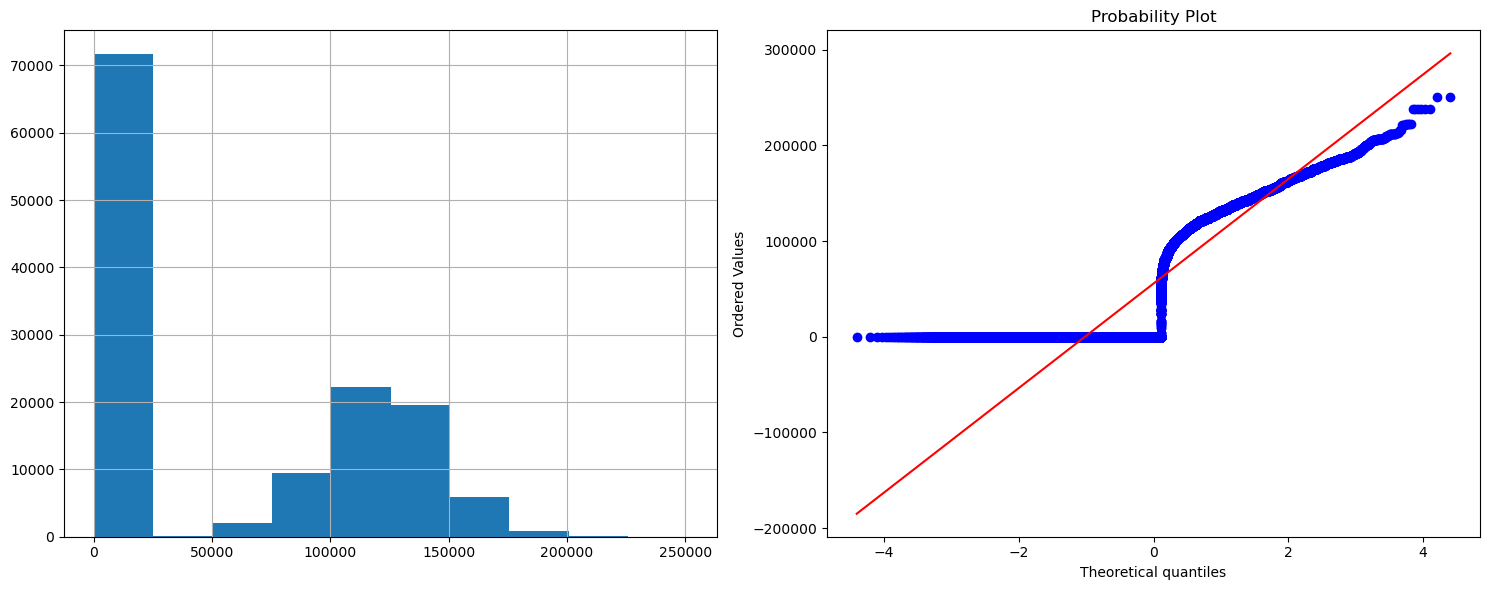

In [28]:
distributions_plot('Balance')

# Feature Selection

<Axes: >

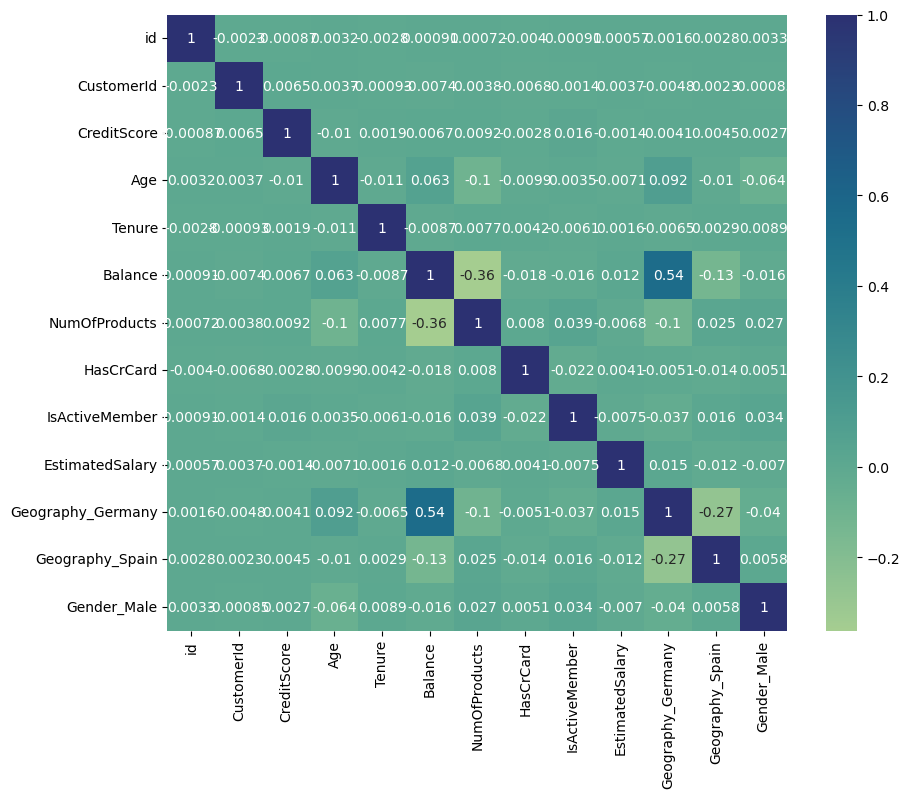

In [29]:
corr=X_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='crest',annot=True)

In [30]:
X_train

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
149380,149380,15780088,679,41.0,9,0.00,2,1.0,1.0,103560.98,0.0,0.0,1.0
164766,164766,15679760,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0.0,0.0,1.0
155569,155569,15637678,551,35.0,5,0.00,1,1.0,0.0,155394.52,0.0,0.0,1.0
124304,124304,15728693,743,31.0,3,57866.03,2,1.0,1.0,107428.42,0.0,1.0,0.0
108008,108008,15613673,675,28.0,2,0.00,2,1.0,0.0,134110.93,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,119879,15730673,668,45.0,6,104576.80,1,1.0,0.0,113081.42,1.0,0.0,1.0
103694,103694,15731166,751,43.0,7,0.00,2,1.0,0.0,88866.39,0.0,0.0,1.0
131932,131932,15573741,753,39.0,7,0.00,2,1.0,0.0,167973.63,0.0,0.0,0.0
146867,146867,15754574,685,48.0,4,0.00,2,1.0,1.0,24998.75,0.0,0.0,0.0


In [31]:
#X_train=X_train.drop(['CustomerId','id'],axis=1)
#X_test=X_test.drop(['CustomerId','id'],axis=1)

In [32]:
XGB_model()

Accuracy =  0.8681491804768685
Roc Auc =  0.7574311477691633


In [33]:
test_df=pd.read_csv('test.csv')
test_df_id=test_df['id']
#test_df=test_df.drop(['id','CustomerId'],axis=1)
test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [34]:
test_cat=pd.get_dummies(test_df[cat_cols],drop_first=True,dtype=float)
test_cat

,Geography_Germany,Geography_Spain,Gender_Male
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
110018,0.0,1.0,1.0
110019,0.0,0.0,0.0
110020,0.0,0.0,1.0
110021,0.0,0.0,0.0


In [35]:
test_df=pd.concat([test_df,test_cat],axis=1)
test_df=test_df.drop(cat_cols,axis=1)
test_df

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,165034,15773898,Lucchese,586,23.0,2,0.00,2,0.0,1.0,160976.75,0.0,0.0,0.0
1,165035,15782418,Nott,683,46.0,2,0.00,1,1.0,0.0,72549.27,0.0,0.0,0.0
2,165036,15807120,K?,656,34.0,7,0.00,2,1.0,0.0,138882.09,0.0,0.0,0.0
3,165037,15808905,O'Donnell,681,36.0,8,0.00,1,1.0,0.0,113931.57,0.0,0.0,1.0
4,165038,15607314,Higgins,752,38.0,10,121263.62,1,1.0,0.0,139431.00,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0.0,1.0,1.0
110019,275053,15774133,Cox,575,36.0,4,178032.53,1,1.0,1.0,42181.68,0.0,0.0,0.0
110020,275054,15728456,Ch'iu,712,31.0,2,0.00,2,1.0,0.0,16287.38,0.0,0.0,1.0
110021,275055,15687541,Yegorova,709,32.0,3,0.00,1,1.0,1.0,158816.58,0.0,0.0,0.0


In [36]:
test_df=test_df.drop('Surname',axis=1)
test_df

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,165034,15773898,586,23.0,2,0.00,2,0.0,1.0,160976.75,0.0,0.0,0.0
1,165035,15782418,683,46.0,2,0.00,1,1.0,0.0,72549.27,0.0,0.0,0.0
2,165036,15807120,656,34.0,7,0.00,2,1.0,0.0,138882.09,0.0,0.0,0.0
3,165037,15808905,681,36.0,8,0.00,1,1.0,0.0,113931.57,0.0,0.0,1.0
4,165038,15607314,752,38.0,10,121263.62,1,1.0,0.0,139431.00,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0.0,1.0,1.0
110019,275053,15774133,575,36.0,4,178032.53,1,1.0,1.0,42181.68,0.0,0.0,0.0
110020,275054,15728456,712,31.0,2,0.00,2,1.0,0.0,16287.38,0.0,0.0,1.0
110021,275055,15687541,709,32.0,3,0.00,1,1.0,1.0,158816.58,0.0,0.0,0.0


In [37]:
xgb=XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 5, n_estimators= 200, subsample= 0.9)
xgbmodel=xgb.fit(X_train,y_train)

In [38]:
new_pred=xgbmodel.predict(test_df)
new_pred

array([0, 1, 0, ..., 0, 0, 0])

In [44]:
prob=(np.round_(xgbmodel.predict_proba(test_df), decimals=5))
probdf=pd.DataFrame(prob)
probdf
      

,0,1
0,0.97787,0.02213
1,0.21071,0.78929
2,0.98529,0.01471
3,0.85642,0.14358
4,0.62047,0.37953
...,...,...
110018,0.97316,0.02684
110019,0.87366,0.12634
110020,0.98163,0.01837
110021,0.84126,0.15874


In [40]:
submission_df=pd.DataFrame()
submission_df['id']=test_df_id
submission_df['Exited']=probdf[1]
submission_df

,id,Exited
0,165034,0.0
1,165035,0.8
2,165036,0.0
3,165037,0.1
4,165038,0.4
...,...,...
110018,275052,0.0
110019,275053,0.1
110020,275054,0.0
110021,275055,0.2


In [41]:
submission_df = submission_df.drop_duplicates(subset='id', keep='first')  # Keep first occurrence
submission_df.to_csv('corrected_submission.csv', index=False)

In [42]:
submission_df

,id,Exited
0,165034,0.0
1,165035,0.8
2,165036,0.0
3,165037,0.1
4,165038,0.4
...,...,...
110018,275052,0.0
110019,275053,0.1
110020,275054,0.0
110021,275055,0.2


In [43]:
submission_df = submission_df.drop_duplicates(subset='id', keep='first')  # Keep first occurrence
submission_df.to_csv('LGBM_submission.csv', index=False)